# Title / Topic
**Drive Smart, Maximise Profits: Data-Driven Insights to Boost NYC Taxi Company Revenue**  
*Key Question:* *How can taxi companies leverage trip data to increase total revenue and optimise fleet performance in New York City?*  


# Background
Running a taxi company in New York City has never been more challenging. With rideshare apps like Uber and Lyft now handling over 75% of for-hire vehicle trips, traditional cabs are fighting to stay competitive. For many taxi companies and drivers, the key to survival is no longer about just driving—it’s about driving smarter.

This project explores real New York City taxi trip data to uncover revenue-boosting insights. By analysing where, when, and how money is made on the streets, we aim to help taxi operators make more informed decisions and improve their bottom line.

Here’s what we’ll dive into:

1. Top 10 Pickup & Drop-off Spots – Which locations bring in the most revenue?
2. High-Earning Days – Which days of the week are best for business?
3. Rush Hour vs. Non-Rush Hour – Is it worth driving in traffic-heavy hours?
4. Rate Code Analysis – Which fare types (e.g. JFK or Newark trips) are the most profitable?
5. Trip Distance vs. Revenue – Do longer trips always mean more money, or is there a better balance?

With this analysis, taxi companies can optimise fleet deployment, refine scheduling, and ultimately increase revenue—even in a highly competitive and evolving market.

# Data
To uncover smart strategies for boosting revenue in New York City’s taxi industry, we’re diving into real-world data collected by the New York City Taxi & Limousine Commission (TLC). This dataset offers an inside look at thousands of rides across the city—where trips start and end, how much passengers pay, and what factors influence earnings. If you want to check out the data yourself, you can find it [here](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N).

The dataset includes 20 key features that help us understand how the taxi business runs and where the biggest earning opportunities lie:

1. VendorID: The taxi provider (1 = Creative Mobile Technologies, 2 = VeriFone Inc.).
2. lpep_pickup_datetime: Date and time when the trip started.
3. lpep_dropoff_datetime: Date and time when the trip ended.
4. passenger_count: The number of passengers in the vehicle (driver-entered value).
5. trip_distance: Distance traveled in miles, recorded by the taximeter.
6. PULocationID: TLC Taxi Zone ID where the trip started.
7. DOLocationID: TLC Taxi Zone ID where the trip ended.
8. RateCodeID: Final rate code used for the trip (e.g., standard rate, JFK, Newark, etc.).
9. store_and_fwd_flag: Indicates whether the trip data was temporarily stored before being sent (Y = Yes, N = No).
10. payment_type: How the passenger paid (e.g., credit card, cash, dispute).
11. fare_amount: Base fare calculated based on time and distance.
12. mta_tax: $0.50 tax applied to trips per New York City regulations.
13. improvement_surcharge: $0.30 surcharge added to all trips.
14. tip_amount: Tip recorded for credit card payments (cash tips not included).
15. total_amount: Total amount charged for the trip (excluding cash tips).
16. congestion_surcharge: An additional fee applied to trips during peak traffic periods.
17. ehail_fee: A booking fee for e-hail (electronic street-hail) rides.
18. tolls_amount: Any toll charges applied to the trip.
19. trip_type: Indicates whether the trip was street-hail (1) or dispatch (2).
20. extra: Additional charges such as late-night and rush hour surcharges.

By analysing these features, we can uncover patterns that help taxi companies make smarter business decisions—from identifying high-value routes to optimising driver shifts and pricing strategies. The goal is to turn data into actionable insights that increase revenue while keeping operations efficient.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import stats, normaltest, chi2_contingency, mannwhitneyu, ttest_ind, f_oneway

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset:
df=pd.read_csv('/Users/rismawidiya01/Downloads/DTI Purwadhika/Document/Module 02/Capstone/NYC TLC Trip Record.csv')
display(df.head(),df.tail())

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0         14.9    1.0      0.5        4.03           0.0        NaN   
1         10.7    1.0      0.5        2.64           0.0        NaN   
2          7.2    1.0      0.5        1.94           0.0        NaN   
3          6.5    0.5      1.5        1.70           0.0        NaN   
4          6.0    0.5      1.5        0.00           0.0        NaN   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    1.0         24.18           1.0        1.0   
1                    1.0         15.84           1.0        1.0   
2                    1.0         11.64           1.0        1.0   
3                    1.0         10.20           1.0        1.0   
4                    1.0          8.00           1.0        1.0   

   congestion_surcharge  
0                  2.75  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
68206         NaN            49            62              NaN        4070.82   
68207         NaN            10           205              NaN           2.14   
68208         NaN            66            37              NaN           3.44   
68209         NaN           225           189              NaN           3.03   
68210         NaN           256           140              NaN           5.82   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
68206        15.70    0.0      0.0        0.00           0.0        NaN   
68207         4.41    0.0      0.0        0.00           0.0        NaN   
68208        16.53    0.0      0.0        3.51           0.0        NaN   
68209        14.98    0.0      0.0        3.20           0.0        NaN   
68210        23.65    0.0      0.0        2.00           0.0        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
68206                    1.0         16.70           NaN        NaN   
68207                    1.0          5.41           NaN        NaN   
68208                    1.0         21.04           NaN        NaN   
68209                    1.0         19.18           NaN        NaN   
68210                    1.0         29.40           NaN        NaN   

       congestion_surcharge  
68206                   NaN  
68207                   NaN  
68208                   NaN  
68209                   NaN  
68210                   NaN

# Getting to Know the Data and Cleaning It Up
Before we jump into the analysis, we first need to take a closer look at the dataset. This step is all about understanding what’s inside, spotting any oddities, and making sure everything is clean and reliable. After all, solid insights come from solid data.

By exploring the trip records, we can identify any inconsistencies, missing values, or unusual patterns that might affect our analysis. If something doesn’t look right, we’ll fix it using a mix of domain knowledge and statistical reasoning to keep everything accurate and meaningful.

So, let’s roll up our sleeves and dive into the data to see what we’re working with.

In [3]:
# Data information:
print(f'The number of rows in the dataset is {df.shape}')
df.info()

The number of rows in the dataset is (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail

In [4]:
# Data summary:
display(df.describe(), df.describe(include='object'))

VendorID    RatecodeID  PULocationID  DOLocationID  \
count  68211.000000  63887.000000  68211.000000  68211.000000   
mean       1.863028      1.117160     98.549735    138.429901   
std        0.343820      1.372913     61.244314     76.761311   
min        1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000     74.000000     74.000000   
50%        2.000000      1.000000     75.000000    138.000000   
75%        2.000000      1.000000    129.000000    219.000000   
max        2.000000     99.000000    265.000000    265.000000   

       passenger_count  trip_distance   fare_amount         extra  \
count     63887.000000   68211.000000  68211.000000  68211.000000   
mean          1.315870       8.114852     16.603545      0.825431   
std           0.979054     585.105955     13.470121      1.269904   
min           0.000000       0.000000    -70.000000     -2.500000   
25%           1.000000       1.110000      9.300000      0.000000   
50%           1.000000       1.850000     13.500000      0.000000   
75%           1.000000       3.210000     19.800000      1.000000   
max           9.000000  120098.840000    490.000000     12.500000   

            mta_tax    tip_amount  tolls_amount  ehail_fee  \
count  68211.000000  68211.000000  68211.000000        0.0   
mean       0.588340      2.139012      0.169627        NaN   
std        0.385819      3.052710      1.099789        NaN   
min       -0.500000    -10.500000      0.000000        NaN   
25%        0.500000      0.000000      0.000000        NaN   
50%        0.500000      1.600000      0.000000        NaN   
75%        0.500000      3.330000      0.000000        NaN   
max        2.750000    222.220000     36.050000        NaN   

       improvement_surcharge  total_amount  payment_type     trip_type  \
count           68211.000000  68211.000000  63887.000000  63877.000000   
mean                0.951625     21.789377      1.373613      1.021933   
std                 0.196875     15.457115      0.508039      0.146465   
min                -1.000000    -71.500000      1.000000      1.000000   
25%                 1.000000     12.900000      1.000000      1.000000   
50%                 1.000000     17.900000      1.000000      1.000000   
75%                 1.000000     26.150000      2.000000      1.000000   
max                 1.000000    491.000000      5.000000      2.000000   

       congestion_surcharge  
count          63887.000000  
mean               0.726748  
std                1.212836  
min               -2.750000  
25%                0.000000  
50%                0.000000  
75%                2.750000  
max                2.750000

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag
count                 68211                 68211              63887
unique                66575                 66519                  2
top     2023-01-09 09:08:00   2023-01-09 00:00:00                  N
freq                      4                     6              63579

In [5]:
# Number of unique data in each column:
pd.set_option('display.max_colwidth', 0)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   VendorID               2                  
1   lpep_pickup_datetime   66575              
2   lpep_dropoff_datetime  66519              
3   store_and_fwd_flag     2                  
4   RatecodeID             6                  
5   PULocationID           226                
6   DOLocationID           249                
7   passenger_count        10                 
8   trip_distance          1870               
9   fare_amount            2553               
10  extra                  16                 
11  mta_tax                6                  
12  tip_amount             1492               
13  tolls_amount           26                 
14  ehail_fee              0                  
15  improvement_surcharge  5                  
16  total_amount           4670               
17  payment_type           5                  
18  trip_type              2                  
19  congestion_surcharge   4                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Unique Sample  
0   [2, 1]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

After taking an initial look at the dataset, here are some key things that stand out:

1. The dataset has 20 columns, covering everything from trip timestamps and locations to passenger counts, fares, and payment methods.
2. Some columns—like store_and_fwd_flag, RatecodeID, passenger_count, payment_type, and trip_type—have missing values (NaN). We’ll need to dig deeper to decide whether to fill, remove, or leave them as they are.
3. The ehail_fee column is entirely empty, which means it’s probably not useful and might as well be dropped.
4. Pickup and drop-off timestamps (lpep_pickup_datetime & lpep_dropoff_datetime) could reveal a lot, like trip duration and the busiest hours for rides.
5. The passenger_count column sometimes has a 0, which doesn’t seem right. That could be a mistake or missing data, so it’s worth investigating.
6. The trip_distance values are all over the place—including some trips recorded as 0.0 miles. That might mean errors, cancelled rides, or just really short trips. We’ll need to clean this up.
7. The RatecodeID column has a weird value of 99.0, which isn’t in the official rate categories. That’s another thing to check.
8. Some categories, like payment_type and trip_type, might work better if we convert them into numbers, making it easier to analyse and visualise trends.

Now that we’ve spotted these quirks, our next step is to clean things up and get the data ready for deeper analysis and Tableau visualisations.

# Data Type Conversion

In [6]:
# Converting columns to numeric (integer):
df['payment_type'] = df['payment_type'].astype('Int64')
df['trip_type'] = df['trip_type'].astype('Int64')
df.dtypes

VendorID                 int64  
lpep_pickup_datetime     object 
lpep_dropoff_datetime    object 
store_and_fwd_flag       object 
RatecodeID               float64
PULocationID             int64  
DOLocationID             int64  
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             Int64  
trip_type                Int64  
congestion_surcharge     float64
dtype: object

# Missing Values

In [7]:
# Percentage of missing values in each column:
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

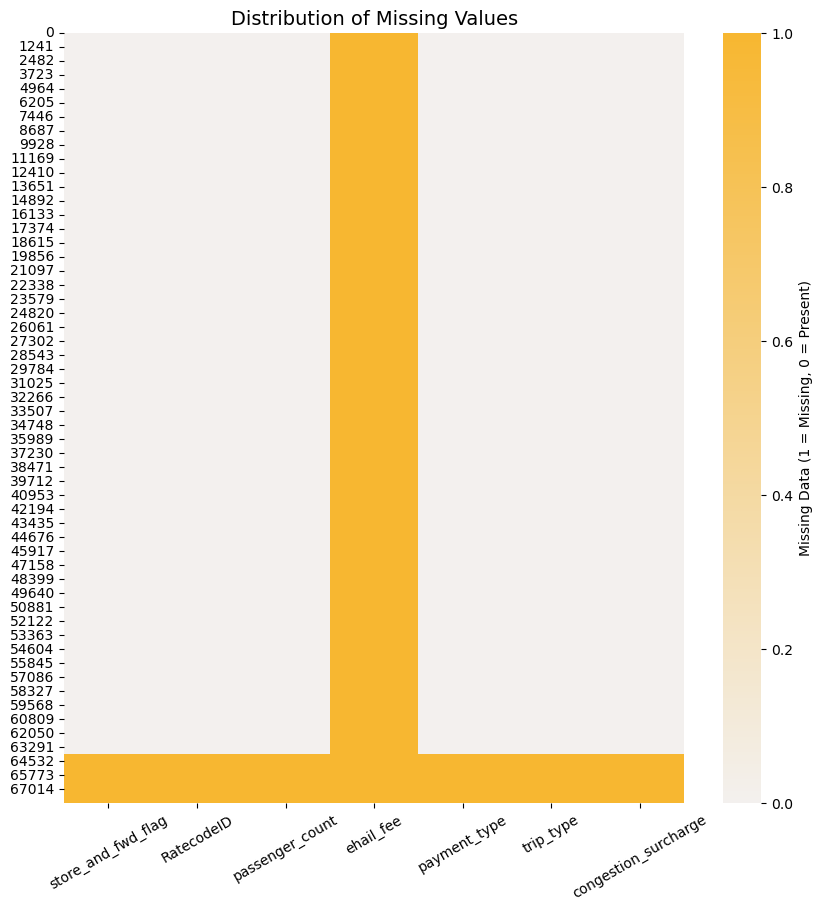

In [8]:
# Defining the custom colourmap:
custom_cmap = sns.light_palette("#F7B731", as_cmap=True)

# Defining figure size:
plt.figure(figsize=(10, 10))

# Creating heatmap with colour bar:
ax = sns.heatmap(df[['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee', 
                      'payment_type', 'trip_type', 'congestion_surcharge']].isna(), 
                 cmap=custom_cmap, 
                 cbar=True)

# Customising colour bar:
cbar = ax.collections[0].colorbar
cbar.set_label("Missing Data (1 = Missing, 0 = Present)", fontsize=10)
cbar.ax.tick_params(labelsize=10)

plt.xticks(rotation=30)
plt.title("Distribution of Missing Values", fontsize=14)
plt.show()

Looking at the missing values, here’s what we found:

- The ehail_fee column is completely empty (100% missing), meaning it doesn’t give us any useful information. It makes sense to just drop it.
- Other columns—like store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, and congestion_surcharge—have around 6.3% missing values. Instead of deleting rows, which could mean losing valuable data, we’ll take a smarter approach to filling in the gaps.

### How We’ll Handle the Missing Data:
Rather than just removing rows, we’ll fill in the blanks based on logical patterns:

- store_and_fwd_flag → This tells us if trip data was temporarily stored before being sent. Since most values are ‘N’ (No), it’s safe to assume the missing ones are also ‘N’.
- RatecodeID → This represents different fare types (like standard rates or airport trips). Since one category is likely the most common, we’ll fill in missing values with the most frequent rate type.
- passenger_count → This shows how many passengers were in the taxi. Since this number can vary, we’ll use the median value (instead of the average) to avoid extreme outliers skewing the data.
- payment_type → Since passengers mostly pay in one or two common ways, we’ll fill in missing values using the most frequent payment method.
- trip_type → If most trips are standard, we’ll assume missing values belong to this common category.
- congestion_surcharge → This is a fixed charge applied to certain trips. Instead of guessing, we’ll use the average surcharge to replace missing values.

By using these logical replacements, we keep as much data as possible while ensuring accuracy. This way, we avoid throwing away useful insights and make the dataset ready for deeper analysis.

### `ehail_fee`

In [9]:
# Dropping ehail_fee:
df.drop(columns=['ehail_fee'], inplace=True)

Reasoning:
- It’s completely empty—every single value is missing, so there’s nothing to work with.
- There’s no way to guess what the values should be based on other data.
- Dropping it makes the dataset cleaner and easier to work with—without losing any valuable insights.

### `store_and_fwd_flag`

In [10]:
# Filling missing values with N:
df['store_and_fwd_flag'].fillna('N', inplace=True)

Reasoning:
- This column is basically a yes/no flag, so it’s straightforward.
- Since most trips have the same value, it makes sense to assume missing ones follow the same pattern.
- Filling in the most common value keeps things consistent and avoids adding unnecessary randomness.

### `RatecodeID`

In [11]:
# RatecodeID = 99.0:
print(df['RatecodeID'].value_counts())
print(df[df['RatecodeID'] == 99.0])

RatecodeID
1.0     62103
5.0     1529 
2.0     158  
4.0     57   
3.0     30   
99.0    10   
Name: count, dtype: int64
       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
1084   1         2023-01-01 19:44:13  2023-01-01 19:58:30   N                   
2174   1         2023-01-02 16:39:05  2023-01-02 17:31:42   N                   
9055   1         2023-01-05 20:33:45  2023-01-05 22:46:41   N                   
14125  1         2023-01-08 11:36:41  2023-01-08 12:14:59   N                   
29143  1         2023-01-15 13:51:42  2023-01-15 14:37:38   N                   
29711  1         2023-01-15 17:52:52  2023-01-15 22:11:55   N                   
35975  1         2023-01-19 01:07:59  2023-01-19 01:17:19   N                   
37691  1         2023-01-19 17:16:59  2023-01-19 22:29:53   N                   
42432  1         2023-01-21 20:29:58  2023-01-22 02:59:25   N                   
45204  1         2023-01-23 13:45:11  2023-01-23 23:36:42   N        

In [12]:
# Marking them as missing (NaN):
df['RatecodeID'] = df['RatecodeID'].replace(99.0, np.nan)

In [13]:
# Filling missing values with mode within each trip_type:
df['RatecodeID'] = df.groupby('trip_type')['RatecodeID'].transform(lambda x: x.fillna(x.mode()[0]))

Reasoning:
- Since we found unexpected values (99), treating them as missing and replacing them ensures accuracy.
- Different types of trips may have different fare structures, but the most common value (mode) gives us the best estimate.
- This method keeps the data clean and consistent while avoiding unnecessary assumptions.

### `passenger_count`

In [14]:
# Filling missing values with median based on trip_type:
df['passenger_count'] = df.groupby('trip_type')['passenger_count'].transform(lambda x: x.fillna(x.median()))

Reasoning:
- Most taxi trips tend to have one passenger, but there are occasional larger group rides that could skew the data.
- Instead of using the average (mean), which can be distorted by outliers, the median gives a more realistic estimate.
- Grouping by trip type makes sense—shared rides and solo trips have different typical passenger counts, so this approach keeps things accurate.

### `payment_type`

In [15]:
# Filling missing values with mode within RatecodeID:
df['payment_type'] = df.groupby('RatecodeID')['payment_type'].transform(lambda x: x.fillna(x.mode()[0]))

Reasoning:
- Different trips have different preferred payment methods—for example, corporate rides are more likely to be paid by credit card, while street pickups might be paid in cash.
- Instead of making random guesses, we fill in missing values with the most common payment method for each RatecodeID (fare type).
- This keeps the data realistic and ensures we’re not introducing any weird patterns that don’t actually happen in New York City taxi rides.

### `trip_type`

In [16]:
# Filling missing values with mode within RatecodeID:
df['trip_type'] = df.groupby('RatecodeID')['trip_type'].transform(lambda x: x.fillna(x.mode()[0]))

Reasoning:
- Trip type tells us whether a ride was a standard street pickup or a pre-arranged trip.
- Since different RatecodeIDs (fare types) are usually tied to specific trip types, it makes sense to fill in missing values based on what’s most common for each fare type.
- This way, we’re keeping the data consistent and logical, ensuring that every trip is classified in a way that makes sense in the real world.

### `congestion_surchage`

In [17]:
# Filling missing values with mean based on RatecodeID:
df['congestion_surcharge'] = df.groupby('RatecodeID')['congestion_surcharge'].transform(lambda x: x.fillna(x.mean()))

Reasoning:
- The congestion surcharge is a fixed fee that depends on New York City regulations and how a trip is classified.
- Since different RatecodeIDs (fare types) have their own pricing rules, the surcharge is likely linked to them.
- By filling in the missing values with the average for each fare type, we’re making sure the data stays realistic and aligned with how pricing actually works.

In [18]:
# Verifying missing values are handled:
print(df.isnull().sum())

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               4334
PULocationID             0   
DOLocationID             0   
passenger_count          4334
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4334
trip_type                4334
congestion_surcharge     4334
dtype: int64


After all the careful data cleaning, we’re left with exactly 4,334 rows still missing values across multiple key columns (RatecodeID, passenger_count, payment_type, trip_type, and congestion_surcharge). This pattern isn’t random—it strongly suggests these rows are incomplete in more ways than we can see.

### What This Tells Us:
- Since these fields are interconnected, their missing values likely mean the entire trip record is unreliable.
- We’ve already filled in missing values where it made sense, using logical correlations. But for these rows, there’s just not enough information to make accurate assumptions.
- Trying to force-fill these gaps could introduce bias or distort the dataset.

### Best Move:
- Drop these 4,334 rows.
- Instead of patching together incomplete data, removing them ensures we’re working with a dataset that’s both clean and trustworthy.

### What This Means for Our Data:
At the start, we had 68,211 rows, but 4,334 of them have missing values spread across multiple key columns.

### How Much We Are Losing:
(4,334 / 68,211) × 100 ≈ 6.36% of the data.

### Why This Isn’t a Big Deal:
- Losing 6.36% is a small trade-off for better data quality.
- These rows are missing too much critical information, making them unreliable.
- If we tried to fill in gaps with averages or most common values, we’d risk skewing important insights (like RatecodeID, payment_type, and trip_type).

In [19]:
# Dropping the remaining missing values:
df.dropna(inplace=True)

In [20]:
# Verifying the remaining missing values are handled:
print(df.isnull().sum())

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64


In [21]:
# Dropping duplicates:
df = df.drop_duplicates()

print("Data after dropping duplicates:", df.shape)

Data after dropping duplicates: (63877, 19)


### Dropping Columns That Don't Add Much Value:
To keep our analysis clean and focused on what truly impacts company revenue, we’re removing several columns that don’t directly contribute to our key business questions:

- VendorID → Identifies which taxi provider handled the ride. Since we’re not comparing companies, this doesn’t add much value.
- lpep_dropoff_datetime → We already have the pickup time, which is more relevant for analyzing demand patterns and peak hours.
- passenger_count → Often unreliable and doesn’t affect fare calculations or revenue.
- store_and_fwd_flag → Indicates how data was transmitted (stored vs. sent live), which is more technical than revenue-related.
- mta_tax → A fixed fee per trip that goes to the government, not the company.
- improvement_surcharge → Another fixed amount that doesn’t impact company profit.
- trip_type → Whether a trip was street-hail or dispatched doesn’t affect base fare or revenue in a meaningful way.
- tip_amount → Tips go directly to the driver and aren’t part of company revenue.
- tolls_amount → Paid by the passenger but passed through to tolling authorities—not profit for the company.
- congestion_surcharge → A government-imposed fee collected from the rider but not retained by the taxi company.
- extra → Covers charges like rush hour or late-night fees, which also aren’t retained by the company.
- total_amount → Includes tips, tolls, surcharges, and taxes—so it doesn’t accurately reflect what the company actually earns.
- payment_type → Shows how the rider paid (cash, card, etc.), but doesn’t influence how much revenue is earned.

By dropping these columns, we can simplify our dataset and stay focused on the metrics that matter most for increasing taxi company revenue.

In [22]:
# Dropping unnecessary columns:
columns_to_drop = ["VendorID", "lpep_dropoff_datetime", "passenger_count", "store_and_fwd_flag", "mta_tax", "improvement_surcharge", "trip_type", "tip_amount", "tolls_amount", "congestion_surcharge", "extra", "total_amount", "payment_type"]
df = df.drop(columns=columns_to_drop)

In [23]:
# Summary of cleaned dataset:
listItem = []
for col in df.columns:
    listItem.append([
        col, 
        df[col].dtype, 
        df[col].isna().sum(), 
        df[col].nunique(), 
        list(df[col].drop_duplicates().sample(2).values)
    ])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'], 
                      data=listItem)

print(df.shape)
dfDesc

(63877, 6)


dataFeatures dataType  null  unique  \
0  lpep_pickup_datetime  object   0     62665    
1  RatecodeID            float64  0     5        
2  PULocationID          int64    0     222      
3  DOLocationID          int64    0     248      
4  trip_distance         float64  0     1727     
5  fare_amount           float64  0     463      

                                 uniqueSample  
0  [2023-01-18 01:47:56, 2023-01-01 23:02:05]  
1  [5.0, 4.0]                                  
2  [67, 46]                                    
3  [173, 226]                                  
4  [10.47, 0.36]                               
5  [8.49, 52.0]

# Outliers Handling

When analysing taxi earnings, some numbers just don’t look "normal"—those are our outliers. Here are the key features we should keep an eye on:

1. trip_distance → Some trips might cover way more miles than usual. Maybe a long airport ride or a driver who took the scenic route?
2. fare_amount → A few rides could have unusually high or low fares—was it a short trip or a pricing glitch?

By focusing on these, we can spot patterns that help drivers make smarter decisions and maximise their earnings. 

In [24]:
# Selecting features likely to have outliers:
outlier_features = ["trip_distance", "fare_amount"]

# Creating interactive boxplots for each feature:
for feature in outlier_features:
    fig = px.box(df, y=feature, title=f"Boxplot of {feature}", color_discrete_sequence=["#F7B731"])
    fig.show()

In [25]:
# Columns to check:
columns_to_check = ["trip_distance", "fare_amount"]

# Function to count outliers using IQR:
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Calculating and printing outlier count for each column:
outlier_counts = {col: count_outliers_iqr(df, col) for col in columns_to_check}

print("Total Outliers in Each Column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Total Outliers in Each Column:
trip_distance: 5335 outliers
fare_amount: 4139 outliers


### Cross-Checking Outliers with Relevant Columns:
When analysing outliers, it’s important to check whether extreme values make sense relative to other factors. Here’s how we’ll compare them:

1. trip_distance → Compare with total_amount (longer trips should generally have higher fares).
2. fare_amount → Compare with trip_distance (is the fare proportional to the distance traveled?).

In [26]:
# Defining the feature pairs and contextually relevant comparisons:
feature_pairs = [
    # Is fare proportional to trip distance?
    ("trip_distance", "fare_amount")
]

# Creating visualisations using Plotly with OLS trendlines:
for x_feat, y_feat in feature_pairs:
    if x_feat in df.columns and y_feat in df.columns:
        fig = px.scatter(
            df, x=x_feat, y=y_feat,
            title=f"{x_feat.replace('_', ' ').title()} vs. {y_feat.replace('_', ' ').title()}",
            labels={
                x_feat: x_feat.replace('_', ' ').title(),
                y_feat: y_feat.replace('_', ' ').title()
            },
            trendline="ols"
        )
        fig.update_traces(marker=dict(color="#F7B731"))
        fig.update_layout(
            title_font_size=18,
            title_x=0.5,
            plot_bgcolor="#F9F9F9",
            paper_bgcolor="#F9F9F9"
        )
        fig.show()
    else:
        print(f"Missing columns: {x_feat}, {y_feat}")

### Outlier Removal Considerations:
1. Kept Data Points:
- Fairly Priced Long Trips: Long-distance trips are kept as long as the fare_amount is proportionally high. These likely reflect normal pricing for extended rides.
- Short Trips with Reasonable Fares: Even very short trips are retained if their fare_amount is within a realistic price range, as short trips are common in dense city areas.
- Zero Distance but Valid Fare: Trips with trip_distance = 0 are only kept if fare_amount is above $0, suggesting the fare was still charged (e.g., for no-shows or minimum charges).

2. Removed Data Points:
- Negative or Zero Fare/Distance: Any trip with a fare_amount ≤ 0 or trip_distance < 0 is removed—these indicate system errors or invalid entries.
- Underpriced Long Trips: Trips over 50 miles where the fare_amount is unrealistically low (e.g., less than $0.50 per mile) are flagged and removed as likely pricing errors.
- Overpriced Short Trips: Short trips (≤ 5 miles) with extremely high fare_amount (e.g., more than $50 or more than 50× distance) are removed as pricing outliers.
- Suspiciously Cheap Trips: Trips under 1 mile with a fare_amount < $2 are considered suspicious or possibly incomplete and are removed to avoid skewing the analysis.

In [27]:
# Function to remove outliers:
def remove_outliers_focused(df):
    df_cleaned = df[
        # Valid fare: must be positive
        (df['fare_amount'] > 0) &

        # Valid trip distance: allow zero only if fare was charged (likely a no-show or cancellation)
        (
            (df['trip_distance'] > 0) |
            ((df['trip_distance'] == 0) & (df['fare_amount'] > 0))
        ) &

        # Underpriced long trips: remove if >50 miles but <$0.50 per mile
        ~((df['trip_distance'] > 50) & (df['fare_amount'] < df['trip_distance'] * 0.5)) &

        # Overpriced short trips: ≤5 miles and fare >50× distance
        ~((df['trip_distance'] <= 5) & (df['fare_amount'] > df['trip_distance'] * 50)) &

        # Extreme outlier: ≤1 mile and fare > $50
        ~((df['trip_distance'] <= 1) & (df['fare_amount'] > 50)) &

        # Suspiciously cheap ride: <1 mile and fare < $2
        ~((df['trip_distance'] < 1) & (df['fare_amount'] < 2)) &

        # Extreme fare per mile: remove if fare is > $1000 per mile
        ~((df['trip_distance'] > 0) & (df['fare_amount'] / df['trip_distance'] > 1000))
    ]

    return df_cleaned

# Applying the filter:
df_cleaned = remove_outliers_focused(df)
print("Shape after cleaning:", df_cleaned.shape)

Shape after cleaning: (60090, 6)


### Verifying Outlier Removal:

In [28]:
# Defining columns to visualise:
columns_to_check = ["trip_distance", "fare_amount"]

# Box plots for cleaned data:
for col in columns_to_check:
    fig = px.box(
        df_cleaned,
        y=col,
        title=f'Box Plot of {col.replace("_", " ").title()} (After Outlier Removal)',
        color_discrete_sequence=["#F7B731"]
    )
    fig.update_layout(
        yaxis_title=col.replace("_", " ").title(),
        plot_bgcolor="#F9F9F9",
        paper_bgcolor="#F9F9F9",
        title_x=0.5,
        title_font_size=18
    )
    fig.show()

#### Analysis:

1. trip_distance: After cleaning up the data, the box plot still shows a few long trips—some over 20 miles, and even a few stretching beyond 50 miles. Most rides, though, are pretty short, likely under 10 miles. The extreme outliers could be airport runs or inter-city trips, which makes sense. If these trips come with reasonable fares, they probably aren’t errors—just rare but valid cases.

2. fare_amount: The cleaned-up fare data shows most metered rides are under $50, but there are still a few that shoot past $200 or even $300. These could be legit long trips.

In [29]:
# Saving the cleaned dataset:
df_cleaned.to_csv("NYC TLC Trip Record Cleaned.csv", index=False)

In [30]:
# Data information on cleaned dataset:
print(f'The number of rows in the cleaned dataset is {df_cleaned.shape}')
df_cleaned.info()

The number of rows in the cleaned dataset is (60090, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 60090 entries, 0 to 63886
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lpep_pickup_datetime  60090 non-null  object 
 1   RatecodeID            60090 non-null  float64
 2   PULocationID          60090 non-null  int64  
 3   DOLocationID          60090 non-null  int64  
 4   trip_distance         60090 non-null  float64
 5   fare_amount           60090 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 3.2+ MB


After handling missing values and removing outliers, we’re left with 60,090 clean and reliable trip records from the original 68,211—meaning 8,121 entries were excluded from the dataset.

(8,121 / 68,211) × 100 ≈ 11.91% of the data.

This reduction makes sense given our focus: we removed entries with invalid fares, unrealistic distances, and extreme anomalies—like short trips with unusually high fares, or trips where the fare breakdown didn’t match the distance traveled. We also filtered out data that didn’t contribute meaningfully to evaluating company revenue.

While the drop is notable, what remains is a refined dataset that reflects actual business performance. This ensures our analysis delivers actionable insights for taxi companies looking to boost revenue through smarter operations and data-driven decision-making.

# Exploratory Data Analysis

#### 1. Top 10 Pickup & Drop-off Spots – Which locations bring in the most revenue?

In [31]:
# Grouping by Pickup and Drop-off Locations using total revenue (sum of fare_amount):
top_pickup = df_cleaned.groupby("PULocationID")["fare_amount"].sum().reset_index()
top_dropoff = df_cleaned.groupby("DOLocationID")["fare_amount"].sum().reset_index()

# Selecting top 10 locations based on total revenue:
top_pickup = top_pickup.nlargest(10, "fare_amount")
top_dropoff = top_dropoff.nlargest(10, "fare_amount")

# Converting location IDs to strings for better x-axis readability:
top_pickup["PULocationID"] = top_pickup["PULocationID"].astype(str)
top_dropoff["DOLocationID"] = top_dropoff["DOLocationID"].astype(str)

# Plotting for pickup locations:
fig1 = px.bar(
    top_pickup.sort_values(by="fare_amount", ascending=False),
    x="PULocationID", 
    y="fare_amount", 
    title="Top 10 Pickup Locations by Total Revenue",
    labels={"PULocationID": "Pickup Location", "fare_amount": "Total Revenue ($)"},
    text_auto=True,
    color_discrete_sequence=["#F7B731"]
)

fig1.show()

# Plotting for drop-off locations:
fig2 = px.bar(
    top_dropoff.sort_values(by="fare_amount", ascending=False),
    x="DOLocationID", 
    y="fare_amount", 
    title="Top 10 Drop-off Locations by Total Revenue",
    labels={"DOLocationID": "Drop-off Location", "fare_amount": "Total Revenue ($)"},
    text_auto=True,
    color_discrete_sequence=["#F7B731"]
)

fig2.show()

#### Analysis:
When we zoom in on the top 10 pickup zones, one location clearly dominates—Zone 74, bringing in over $176K in total revenue. That’s a huge lead over the others, and it’s safe to assume this zone includes a major transportation hub where longer, higher-paying rides often begin. Following that is Zone 75, with about $120K in revenue. Beyond these, other high-performing pickup zones bring in between $26K and $55K, suggesting they’re still valuable, but not in the same league as the top two.

The drop-off zones tell a different story. The top one—again, Zone 75—only hits around $33K, and the rest follow closely behind. This more even spread suggests that while many trips start in a few key areas, they end all over the city—likely in residential neighbourhoods, office districts, or tourist spots.

#### 2. High-Earning Days – Which days of the week are best for business?

In [32]:
# Ensuring datetime format:
df_cleaned["lpep_pickup_datetime"] = pd.to_datetime(df_cleaned["lpep_pickup_datetime"])

# Converting pickup datetime to actual days of the week:
df_cleaned["DayOfWeek"] = df_cleaned["lpep_pickup_datetime"].dt.day_name()

# Grouping by day of the week and calculating the total revenue:
daywise_fare = df_cleaned.groupby("DayOfWeek")["fare_amount"].sum().reset_index()

# Sorting days in a logical order:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daywise_fare["DayOfWeek"] = pd.Categorical(daywise_fare["DayOfWeek"], categories=days_order, ordered=True)
daywise_fare = daywise_fare.sort_values("DayOfWeek")

# Rounding for better readability:
daywise_fare["fare_amount"] = daywise_fare["fare_amount"].round(2)

# Creating a bar chart:
fig = px.bar(daywise_fare, x="DayOfWeek", y="fare_amount",
             title="Total Revenue by Day of the Week",
             labels={"fare_amount": "Total Revenue ($)", "DayOfWeek": "Day of the Week"},
             color="fare_amount",
             color_continuous_scale="oryel")

fig.show()

#### Analysis:
When looking at revenue trends by day of the week, Tuesday comes out on top, generating over $150K in total revenue. Monday, Wednesday, Thursday, and Friday aren’t far behind, each pulling in between $130K–$140K. On the other hand, weekends—Saturday and Sunday—drop below $130K, making them the least profitable days overall.

This pattern strongly suggests that weekday travel, likely made up of commuter rides, business appointments, and routine errands, is the primary driver of revenue. The weekend dip is a bit surprising—normally, you'd expect nightlife, shopping, and leisure activities to boost demand. One likely explanation is that weekend trips are shorter, more localised, or people lean more on buses or subways. Another possibility is that demand is spread out, making it harder for drivers to catch a consistent stream of fares.

#### 3. Rush Hour vs. Non-Rush Hour – Is it worth driving in traffic-heavy hours?

In [33]:
# Converting datetime:
df_cleaned['hour'] = pd.to_datetime(df_cleaned['lpep_pickup_datetime']).dt.hour

# Total revenue by hour of the day:
hourly_fares = df_cleaned.groupby('hour')['fare_amount'].sum().reset_index()

fig4 = px.line(hourly_fares, x='hour', y='fare_amount',
               title="Total Revenue by Hour of the Day",
               labels={'hour': 'Hour of Day', 'fare_amount': 'Total Revenue ($)'},
               markers=True,
               line_shape="linear")

# Updating line colour:
fig4.update_traces(line=dict(color="#F7B731"))

fig4.show()

#### Analysis:
When we break down revenue by the hour, a clear pattern emerges. Early mornings (12 AM to 5 AM) are the slowest, with revenue consistently under $20K. That’s expected—most people are asleep, and only a handful of rides come from late-night workers, airport travelers, or the occasional night out.

Starting around 6 AM, things begin to pick up, likely fueled by morning commuters and early airport trips. The upward trend continues, with a strong surge from noon to 6 PM, peaking between 3 PM and 6 PM. This is the sweet spot: the afternoon rush, when people are getting off work, heading to appointments, or gearing up for their evening plans.

After 6 PM, revenue begins to taper off. By 10 PM, the pattern starts to resemble the quiet early morning hours again—lower demand, fewer rides, and decreased earnings.

#### 4. Rate Code Analysis – Which fare types (e.g. JFK or Newark trips) are the most profitable?

In [34]:
# Mapping RatecodeID to descriptive labels:
rate_code_mapping = {
    1: "Standard Rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated Fare",
    6: "Group Ride"
}

# Grouping by RatecodeID and calculating average fare amount:
rate_code_avg_fares = df_cleaned.groupby('RatecodeID')['fare_amount'].mean().reset_index()

# Mapping RatecodeID to descriptive labels:
rate_code_avg_fares['Rate Code'] = rate_code_avg_fares['RatecodeID'].map(rate_code_mapping)

# Creating a bar chart with mapped labels:
fig5 = px.bar(rate_code_avg_fares, x='Rate Code', y='fare_amount',
              title="Average Fare Amount by Rate Code",
              labels={'fare_amount': 'Average Fare ($)', 'Rate Code': 'Rate Code'},
              text_auto='.2s',
              color='fare_amount', color_continuous_scale="oryel")

fig5.show()

#### Analysis:
When looking at average fare amounts by rate code, longer-distance and specialty trips clearly stand out. Nassau or Westchester rides average the highest at $100, followed closely by Newark at $98 and JFK at $70—reflecting the premium nature of airport and out-of-city trips.

Negotiated Fares come in lower at $29, while Standard Rate rides, which make up the majority of daily trips, average just $16. Although these standard fares pay less per trip, they represent the core of the business in terms of volume.

Meanwhile, higher average fares from specialty categories suggest strong earning potential for drivers who can strategically target these trips.

#### 5. Trip Distance vs. Revenue – Do longer trips always mean more money, or is there a better balance?

In [35]:
# Number of trips of each distance:
df_summary = df_cleaned.groupby('trip_distance', as_index=False).agg(
    total_revenue=('fare_amount', 'sum'),
    trip_count=('trip_distance', 'count')
)

# Creating scatter plot:
fig6 = px.scatter(
    df_summary,
    x='trip_distance',
    y='total_revenue',
    hover_data=['trip_count'],
    title="Trip Distance vs. Total Revenue",
    labels={
        'trip_distance': 'Trip Distance (miles)',
        'total_revenue': 'Total Revenue ($)',
        'trip_count': 'Number of Trips'
    },
    trendline='ols'
)

# Updating marker colour:
fig6.update_traces(marker=dict(color="#F7B731"))

fig6.show()

#### Analysis:
This scatter plot gives us a solid picture of how trip distance relates to total revenue. The main takeaway? Short-distance trips—especially those under 10 miles—are driving the bulk of the earnings. These rides happen more often and, even though they’re cheaper individually, they add up fast. We’re seeing clusters of revenue between $500 and $2,000 for many short distances, which shows how valuable high-volume short trips really are.

As trips get longer, total revenue still increases, but the relationship becomes less predictable. Once we pass the 20-mile mark, trips become rarer and the fare amounts start to vary a lot more. That could be due to negotiated rates, discounts, or factors like return-trip uncertainty that aren’t reflected directly in the data.

Interestingly, there are a few very short trips with unusually high revenue. These could be cases where surge pricing kicked in during high-demand periods, or they might involve premium bookings or luxury vehicles.

# Statistical Test

#### 1. Top 10 Pickup & Drop-off Spots – Which locations bring in the most revenue?

In [36]:
# Selecting top locations (to keep analysis manageable):
top_pickups = df_cleaned["PULocationID"].value_counts().head(10).index
filtered_df = df_cleaned[df_cleaned["PULocationID"].isin(top_pickups)]

# Grouping total amount by pickup locations:
groups = [group["fare_amount"].values for _, group in filtered_df.groupby("PULocationID")]

# Running ANOVA test:
f_stat, p_value = stats.f_oneway(*groups)

# Displaying results:
print(f"ANOVA test results - Pickup Locations:")
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("Reject H₀: Significant difference found - Some pickup locations are more profitable than others.")
else:
    print("Fail to Reject H₀: No significant difference - Pickup location does not strongly affect total earnings.")

ANOVA test results - Pickup Locations:
F-statistic: 202.21514063444988, P-value: 0.0
Reject H₀: Significant difference found - Some pickup locations are more profitable than others.


In [37]:
# Selecting top drop-off locations (to keep analysis manageable):
top_dropoffs = df_cleaned["DOLocationID"].value_counts().head(10).index
filtered_df_dropoff = df_cleaned[df_cleaned["DOLocationID"].isin(top_dropoffs)]

# Grouping total amount by drop-off locations:
groups_dropoff = [group["fare_amount"].values for _, group in filtered_df_dropoff.groupby("DOLocationID")]

# Running ANOVA test:
f_stat_dropoff, p_value_dropoff = stats.f_oneway(*groups_dropoff)

# Displaying results:
print(f"ANOVA test results - Drop-off Locations:")
print(f"F-statistic: {f_stat_dropoff}, P-value: {p_value_dropoff}")

# Interpretation:
if p_value_dropoff < 0.05:
    print("Reject H₀: Significant difference found - Some drop-off locations are more profitable than others.")
else:
    print("Fail to Reject H₀: No significant difference - Drop-off location does not strongly affect total earnings.")

ANOVA test results - Drop-off Locations:
F-statistic: 290.8097038313683, P-value: 0.0
Reject H₀: Significant difference found - Some drop-off locations are more profitable than others.


#### 2. High-Earning Days – Which days of the week are best for business?

In [38]:
# Converting datetime column to actual datetime format:
df_cleaned["PUDateTime"] = pd.to_datetime(df_cleaned["lpep_pickup_datetime"])

# Extracting the day of the week (0 = Monday, 6 = Sunday):
df_cleaned["DayOfWeek"] = df_cleaned["PUDateTime"].dt.day_name()

# Grouping total fare by day of the week:
groups = [group["fare_amount"].values for _, group in df_cleaned.groupby("DayOfWeek")]

# Running ANOVA test:
f_stat, p_value = stats.f_oneway(*groups)

# Displaying results:
print("ANOVA Test - High-Fare Days:")
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("Reject H₀: Significant difference found - Some days generate higher total amount than others.")
else:
    print("Fail to reject H₀: No significant difference - Total amount is fairly consistent across all days.")

ANOVA Test - High-Fare Days:
F-statistic: 3.5708458041030107, P-value: 0.001540247590461933
Reject H₀: Significant difference found - Some days generate higher total amount than others.


#### 3. Rush Hour vs. Non-Rush Hour – Is it worth driving in traffic-heavy hours?

In [39]:
# Converting datetime column to actual datetime format:
df_cleaned["PUDateTime"] = pd.to_datetime(df_cleaned["lpep_pickup_datetime"])

# Extracting hour of the day:
df_cleaned["Hour"] = df_cleaned["PUDateTime"].dt.hour

# Defining rush hours (e.g., 7-9 AM & 4-7 PM):
rush_hours = df_cleaned[(df_cleaned["Hour"].between(7, 9)) | (df_cleaned["Hour"].between(16, 19))]
non_peak_hours = df_cleaned[~((df_cleaned["Hour"].between(7, 9)) | (df_cleaned["Hour"].between(16, 19)))]

# Performing t-test:
t_stat, p_value = stats.ttest_ind(rush_hours["fare_amount"], non_peak_hours["fare_amount"], equal_var=False)

# Displaying results:
print(f"T-test results - Rush Hour vs. Non-Rush Hours:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("Reject H₀: Significant difference found - Rush hour total amount differs from non-rush hour total amount.")
else:
    print("Fail to reject H₀: No significant difference - Driving during rush hours does not significantly impact total amount.")

T-test results - Rush Hour vs. Non-Rush Hours:
T-statistic: -7.693851711856619, P-value: 1.4500911056169943e-14
Reject H₀: Significant difference found - Rush hour total amount differs from non-rush hour total amount.


#### 4. Rate Code Analysis – Which fare types (e.g. JFK or Newark trips) are the most profitable?

In [40]:
# Grouping data by rate codes:
rate_code_groups = [
    df_cleaned[df_cleaned["RatecodeID"] == code]["fare_amount"]
    for code in df_cleaned["RatecodeID"].dropna().unique()
]

# Perform ANOVA test:
f_stat, p_value = stats.f_oneway(*rate_code_groups)

# Displaying results:
print("ANOVA Test Results - Average Fare by Rate Code:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation:
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in average fare amounts across rate codes.")
else:
    print("Fail to reject H₀: No significant difference in average fare amounts across rate codes.")

ANOVA Test Results - Average Fare by Rate Code:
F-statistic: 2051.3601, P-value: 0.0000
Reject H₀: There is a significant difference in average fare amounts across rate codes.


#### 5. Trip Distance vs. Revenue – Do longer trips always mean more money, or is there a better balance?

In [41]:
# Pearson correlation test:
corr, p_value = stats.pearsonr(df_cleaned["trip_distance"], df_cleaned["fare_amount"])

# Displaying results:
print("Pearson Correlation Test - Trip Distance vs. Total Amount:")
print(f"Correlation Coefficient: {corr}, P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("Reject H₀: There is a statistically significant correlation between trip distance and total amount.")
else:
    print("Fail to reject H₀: No significant correlation found between trip distance and total amount.")

Pearson Correlation Test - Trip Distance vs. Total Amount:
Correlation Coefficient: 0.9327734728024141, P-value: 0.0
Reject H₀: There is a statistically significant correlation between trip distance and total amount.


## Summary and Actionable Recommendations for New York City Taxi Company

---

### 1. Zone-Based Fleet Optimisation

**Focus on East Harlem (Zones 74 & 75):**  
Together, East Harlem North and South generate over **$296K** in pickup revenue—**~46.3% of total pickups from the top 10 pickup locations**. Notably, **both zones also appear in the top 10 drop-off locations**, suggesting these are **two-way high-demand areas** where drivers can consistently earn on both pickup and drop-off.

**Actions:**  
- Deploy **20%** of the fleet in these zones during **6–10 AM** and **1–6 PM**.
- Use GPS-enabled dispatching to rotate idle taxis into these high-performing areas.
- Consider local partnerships with institutions or services that are open 24 hours (e.g., NYC Health + Hospitals/Metropolitan, Harlem–148th Street Station) to maintain demand.

---

### 2. Driver Shift Scheduling

**Weekday Revenue Dominates:**  
Total weekday (Mon–Fri) revenue = **$691.6K**, which is **~77.2%** of total revenue. Tuesday alone generates **~16.8%** of the total revenue **(>$150K)**. Weekends (Sat–Sun) contribute **only ~22.8%** combined.

**Actions:**  
- Allocate **70% of driver shifts** between **Monday and Friday**.
- Prioritise **6–10 AM** and **1–6 PM** (commuter peaks).
- Offer bonuses, e.g., **$10 for completing 5+ rush-hour rides**.

---

### 3. Time-of-Day Efficiency

**Early Morning Hours (12–5 AM):**  
Revenue during this window is consistently **under $20K**, which is approximately **<10%** of total revenue.

**Actions:**  
- Assign only **10%** of the fleet during these hours.
- Focus deployment near nightlife zones or 24/7 services (e.g., 230 Fifth Rooftop Bar NYC, Anytime Kitchen).
- Use this window for **vehicle maintenance**, **driver breaks**, or **repositioning for morning rush**.

---

### 4. Standard Fare vs. Premium Trips

**Standard Fares Drive Volume, Premium Trips Drive Value:**  
Standard Rate trips average **$16** and dominate by volume. However, **Nassau/Westchester ($100)**, **Newark ($98)**, and **JFK ($70)** trips offer higher fares per ride.

**Actions:**  
- Focus operations in high-volume zones (e.g., **Manhattan**, **Queens**, **Brooklyn**).  
- Strategically target premium trips, especially during peak times or with return potential.  
- Use driver bonuses (e.g., **$10 incentive per completed airport trip during peak hours**).

---

### 5. Short-Trip Maximisation

**Trips Under 10 Miles Dominate Volume and Revenue:**  
Short trips (<10 miles) contribute **over 75%** of total revenue and make up the majority of all rides. These trips are more frequent, quicker to complete, and drive consistent earnings.

**Actions:**  
- Introduce short-trip bonus tiers, e.g., **$25 bonus for 15 rides <10 miles** in one shift.
- Target hot zones like **downtown**, **office districts**, and **transit hubs**.